### CNN for Handwriting Analysis

**Step 1:** Installation of Necessary Packages <br />
**Step 2:** Placing photos of train and test set into train_data and test_data

In [1]:
import sys
import numpy as np
import pandas as pd
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

The minimum alphabet is J and the maximum is O


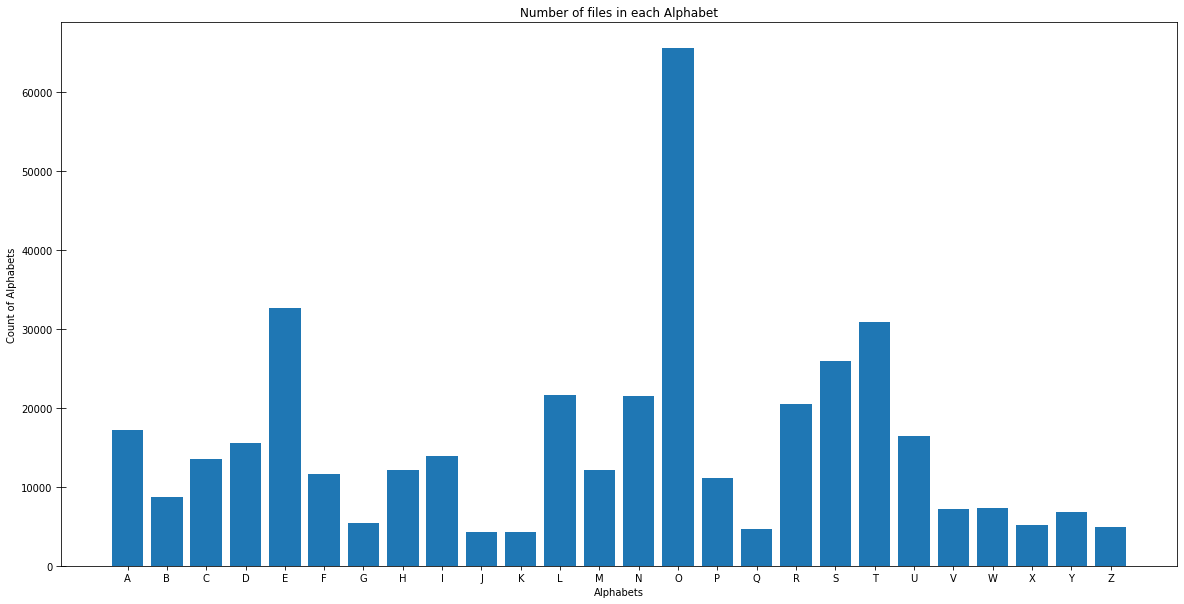

In [2]:
dir = "./Handwriting Data/Train/"
alp = []
num = []
for i in os.listdir(dir):
    sub_directory = os.path.join(dir,i)
    a = len([item for item in os.listdir(sub_directory)])
    alp.append(i)
    num.append(a)

df_alpha_num = pd.DataFrame.from_dict({'Alphabet': alp, 'Count': num})    

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar('Alphabet', height = 'Count', data=df_alpha_num)
ax.tick_params(axis='y', length = 10, direction='inout')
ax.set(title = 'Number of files in each Alphabet', ylabel = 'Count of Alphabets', xlabel = 'Alphabets')

train_min = df_alpha_num["Alphabet"][df_alpha_num.Count==min(df_alpha_num.Count)]
train_max = df_alpha_num["Alphabet"][df_alpha_num.Count==max(df_alpha_num.Count)]

print(f"The minimum alphabet is {train_min.iloc[0]} and the maximum is {train_max.iloc[0]}")

The minimum alphabet is X and the maximum is Q


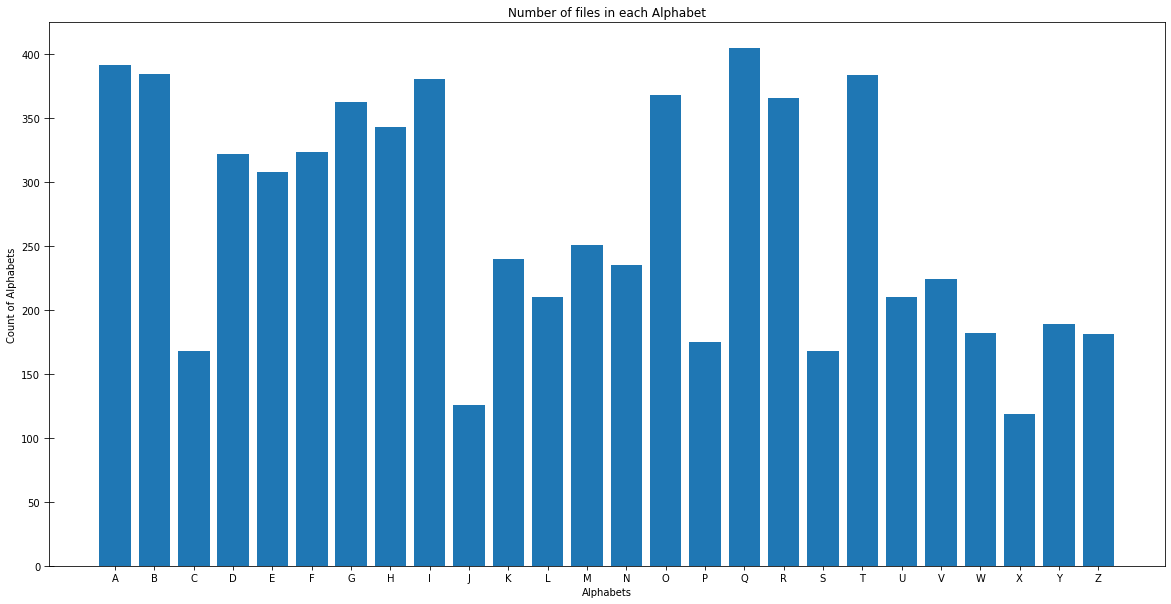

In [3]:
dir = "./Handwriting Data/Validation/"
alp = []
num = []
for i in os.listdir(dir):
    sub_directory = os.path.join(dir,i)
    a = len([item for item in os.listdir(sub_directory)])
    alp.append(i)
    num.append(a)

df_alpha_num = pd.DataFrame.from_dict({'Alphabet': alp, 'Count': num})    

fig, ax = plt.subplots(figsize=(20, 10))
ax.bar('Alphabet', height = 'Count', data=df_alpha_num)
ax.tick_params(axis='y', length = 10, direction='inout')
ax.set(title = 'Number of files in each Alphabet', ylabel = 'Count of Alphabets', xlabel = 'Alphabets')

val_min = df_alpha_num.Alphabet[df_alpha_num.Count==min(df_alpha_num.Count)]
val_max = df_alpha_num.Alphabet[df_alpha_num.Count==max(df_alpha_num.Count)]

print(f"The minimum alphabet is {val_min.iloc[0]} and the maximum is {val_max.iloc[0]}")

10.jpg
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


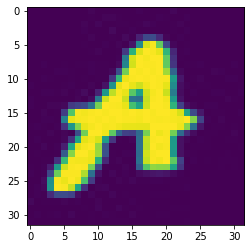

In [4]:
# Example Vizualization of Train Set data
dir = "./Handwriting Data/Train/A"
img_size = 32
c = 0
for i in os.listdir(dir):
    c+=1
    while c <= 1:
        print(i)
        img = cv2.imread(os.path.join(dir,i),0)
        img = cv2.resize(img,(img_size,img_size))
        break

print(img)
plt.imshow(img)
plt.show()

In [5]:
dir = "./Handwriting Data/Train/"
train_data = []
img_size = 32
for i in os.listdir(dir):
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4200:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [6]:
val_dir = "./Handwriting Data/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 400:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [7]:
print(f"Length of train set is {len(train_data)}")
print(f"Length of test set is {len(val_data)}")

Length of train set is 109200
Length of test set is 7014


In [8]:
random.shuffle(train_data)
random.shuffle(val_data)

In [9]:
# Split data from trainset into labels and features
train_x = []
train_y = []
for features,label in train_data:
    train_x.append(features)
    train_y.append(label)

In [10]:
# Split data from validation set into labels and features
val_x = []
val_y = []
for features,label in val_data:
    val_x.append(features)
    val_y.append(label)

In [11]:
# Transform the Y-hat labels into binary outputs of (0,1)
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_y)
val_Y = LB.fit_transform(val_y)

In [12]:
# binarize train_x to get relative value between (0 and 256)
train_X = np.array(train_x)/255.0  # Divide by 255 to get value between 0 and 1 for each pixel

# Assign train_X and train_Y data
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [13]:
# binarize train_x to get relative value between (0 and 256)
val_X = np.array(val_x)/255.0   # Divide by 255 to get value between 0 and 1 for each pixel

# Assign train_X and train_Y data
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [14]:
# Final Matrix
print(train_X.shape, train_Y.shape)
print(val_X.shape, val_Y.shape)

(109200, 32, 32, 1) (109200, 26)
(7014, 32, 32, 1) (7014, 26)


### CNN Model

In [15]:
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import InputLayer, Dense, Activation, Flatten, MaxPooling2D, Dropout, Conv2D
import tensorflow as tf

In [16]:
model = Sequential()
model.add(InputLayer(input_shape=(32, 32, 1)))
model.add(Conv2D(32, (5, 5), strides=(2,2), padding = "same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(16, (3, 3), strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
model.add(Flatten())

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(26, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 16)          4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               80200     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_X,train_Y, epochs=15, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/15
 400/3413 [==>...........................] - ETA: 44s - loss: 1.4824 - accuracy: 0.5572

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

### Saving Model for future application

In [ ]:
tf.keras.models.save_model(model, 'model_best')

### Loading Model and Applying Model to Pictures of words

In [ ]:
m2 = tf.keras.models.load_model('model_best')

In [ ]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [ ]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = m2.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

In [ ]:
def get_word(letter):
    word = "".join(letter)
    return word

In [ ]:
letter,image = get_letters("./Handwriting Data/Words/chicken.rice.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

In [ ]:
letter,image = get_letters("./Handwriting Data/Words/Lannister.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

In [ ]:
letter,image = get_letters("./Handwriting Data/Words/Winterfell.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

In [ ]:
letter,image = get_letters("./Handwriting Data/Words/Thank.Q.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

In [ ]:
letter,image = get_letters("./Handwriting Data/Words/prof.tt.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)